### **libs**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
from tqdm import tqdm
import torch

import sys
sys.path.append('D:\diplom_2\my_test')
import my_funcs as mf

import my_thermal_funcs as mtf

### **read data**

In [2]:
path_data=fr'data/thermal_v_fact_tau=0.0012500000000000002_n=21.csv'

In [3]:
data=pd.read_csv(path_data,header=None)
data=data.T
print(data.shape)

(21, 242)


In [4]:
data=np.array(data)

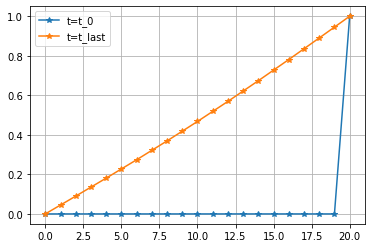

In [5]:
plt.plot(data[:,0],'-*',label='t=t_0')
plt.plot(data[:,-1],'-*',label='t=t_last')
plt.grid()
plt.legend()

### **re-generate new data (with add time>> time_train)**

In [6]:
generate_flg=True # True - генерация, False - чтение уже сгенерированных
# generate_flg=False

# n=21 #число узлов
# L=1 # длина расчт области
# T=0.3 #конечное время (было 0.3 на трейне)
# # T=1.0
# kurant=0.5

# h=L/(n-1)
# b=(n-1)*0.1*L #width % of L (длина участка с v=1, составляет 10% от расчт области)
# # IC
# v=[0 for i in range(0,n)]
# # v=[np.sin(6.6*np.pi*i/n) for i in range(0,n)] #sin(6.6x)
# # BC
# v[0]=0
# v[-1]=1

# plt.plot(v,'-*')
# plt.grid()

# CUSTOM_TAU=kurant*h**2#0.009
# # CUSTOM_TAU=0.01
# data,x_lst,tau,time_lst=mtf.generate_data(generate_flg,v,T,L,0.5,h,n,CUSTOM_TAU=CUSTOM_TAU,save_flg=True)
# print(data.shape)

### **read net**

In [7]:
path_model=fr"data/models/model_thermal_n=21_[5, 24, 3, 0.01, 2, False, 'E1', 0.2]_seed_1.pth"

In [8]:
net=torch.load(path_model)

In [9]:
net.layer

ModuleList(
  (0): Linear(in_features=5, out_features=24, bias=True)
  (1-2): 2 x Linear(in_features=24, out_features=24, bias=True)
  (3): Linear(in_features=24, out_features=1, bias=True)
)

### **subsampling**

In [12]:
# t_factor = 10  # time subsample factor 
# s_factor = 4   # space subsample factor

t_factor = 10  # time subsample factor 
s_factor = 4   # space subsample factor

L=1
n=21
h=L/(n-1)
tau=0.00125
train_split=0.7
Tsim=len(data[0])
dxc,dtc,coarse_t,coarse_x,v_coarse,Lxc,\
Ltc,v_coarse_train,v_coarse_test=mf.subsampling(s_factor,t_factor,h,tau,Tsim,n,data,train_split=train_split)

full_sample (6, 25)
train (6, 17)
test (6, 8)


### **view predicts**

In [13]:
#device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

v_train = torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)

method='RK3'
L=1

##### **1. on subsampling data**

In [14]:
NN_sim,T_sim,x_sim=mf.make_simulation(net,v_coarse,L,Lxc,dtc)

RK3


100%|█████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 729.25it/s]


In [17]:
T=0.3

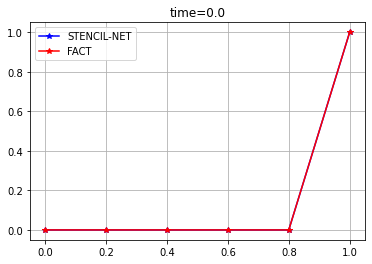

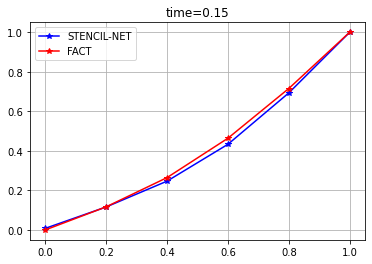

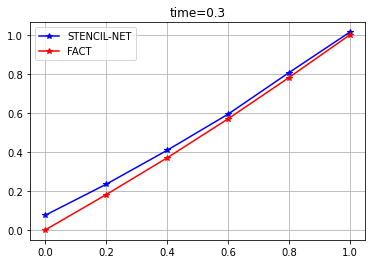

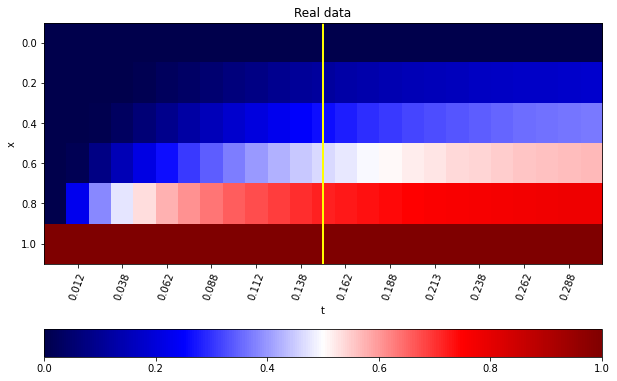

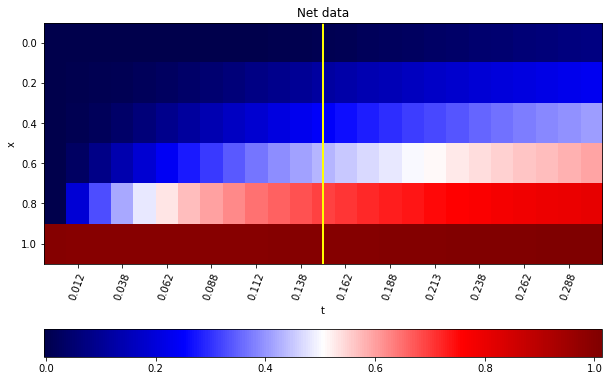

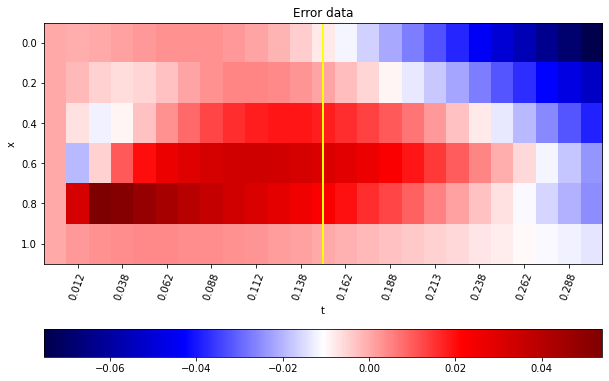

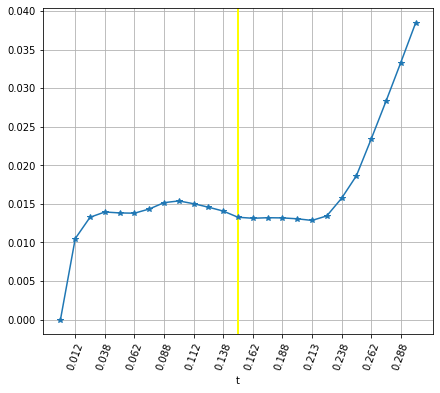

In [18]:
mf.view_results(T_sim,x_sim,NN_sim,v_coarse,T,dtc,n=3)

mf.view_result_imshow(NN_sim,v_coarse,T,dtc,L,dxc,figsize=(10,8))

mf.view_result_metric(NN_sim,v_coarse,T,dtc,L,dxc)

##### **2. on full data**

In [23]:
NN_sim,T_sim,x_sim=mf.make_simulation(net,data,L=4,Lxc=21,dtc=dtc)

RK3


100%|███████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 968.28it/s]


ValueError: x and y must have same first dimension, but have shapes (21,) and (6,)

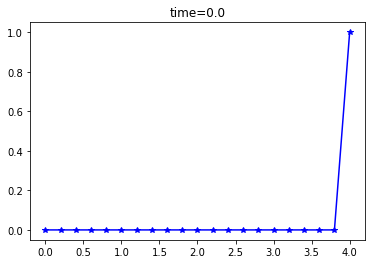

In [24]:
mf.view_results(T_sim,x_sim,NN_sim,v_coarse,T,dtc,n=3)